In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [15]:
# Get our stocks
def get_simulation(ticker, name):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-01-01')['Adj Close']
    
    log_returns = np.log(1+ data.pct_change())
    
    u = log_returns.mean()
    
    var = log_returns.var()
    
    drift = u - (0.5 * var) 
    stdev = log_returns.std()
    
    time = 365
    loops = 10
    
    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(time, loops)))
    
    S0 = data.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    
    for t in range(1, time):
        price_list[t] = price_list[time - 1] * daily_returns[t]
    
    plt.figure(figsize=(10,8))
    plt.title('Monte Carlo 1 Year '+ name)
    plt.ylabel("price {$}")
    plt.xlabel('Time {Days}')
    plt.plot(price_list)
    plt.show()
    

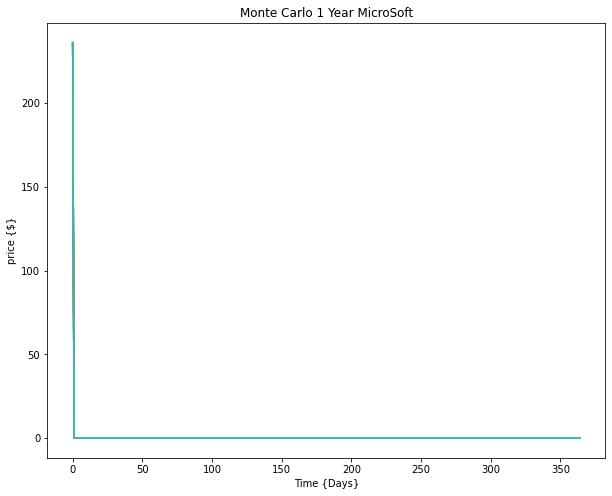

In [16]:
get_simulation('MSFT', 'MicroSoft')